# Stats

###### Measures of Central tendency

- **mean**, **median**
    - **trimmed mean**: mean after certain % of outliers removed
- **EV**
- **mode**
    - **bi-modal**: when two values tie for mode
    
###### Measures of Spread

- **min**, **max**, **range**
- **quantile** (cut points), **quartile**, **percentile**, **IQR**
- **mean absolute diviation**: The average of deviations from a central point, usually the mean. People often think and talk in terms of mean absolute deviation. For example, "we sell 100 units a day ± 10%". This measure of spread is the most common measure of spread/variance in conversational language
- **variance**, **standard deviation**
- **skew**

### Simulation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(29)

- [`numpy.random`](https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random)
    - `choice` selects random options from a list
    - `uniform` generates numbers between a given lower and upper bound
    - `random` generates numbers between 0 and 1
    - `randn` generates numbers from the standard normal distribution
    - `normal` generates numbers from a normal distribution with a specified mean and standard deviation

### Probability Distributions

- **Uniform**: equal likelihoods among all outcomes, like a fair coin.
- **Binomial**: are all about determining a binary outcome of an event. Success/failure, for example.
- **Normal** distributions model a continuous random variable.
- **Poisson** distributions model a certain amount of events occuring over a time interval
- [More Distributions](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm])

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code

np.random.seed(123)

#### Example Problems
###### <u>Carnival Dice Rolls</u>

1. Pay 5 dollars and roll 3 dice. If sum > 12, get 15 dollars, else nothing. Assume dice are fair. Should I play? How would this change if the winning condition was a sum greater than or equal to 12?


In [3]:
n_trials = nrows = 10_000
n_dice = ncols = 3

# array of rolls                                # rolls (30_000)   # 10_000 rows x 3 cols
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls

array([[6, 3, 5],
       [3, 2, 4],
       [3, 4, 2],
       ...,
       [6, 6, 5],
       [6, 6, 6],
       [1, 3, 5]])

In [4]:
                        # sum of each row (axis = 0 for column)
sums_by_trial = rolls.sum(axis = 1)
sums_by_trial

array([14,  9,  9, ..., 17, 18,  9])

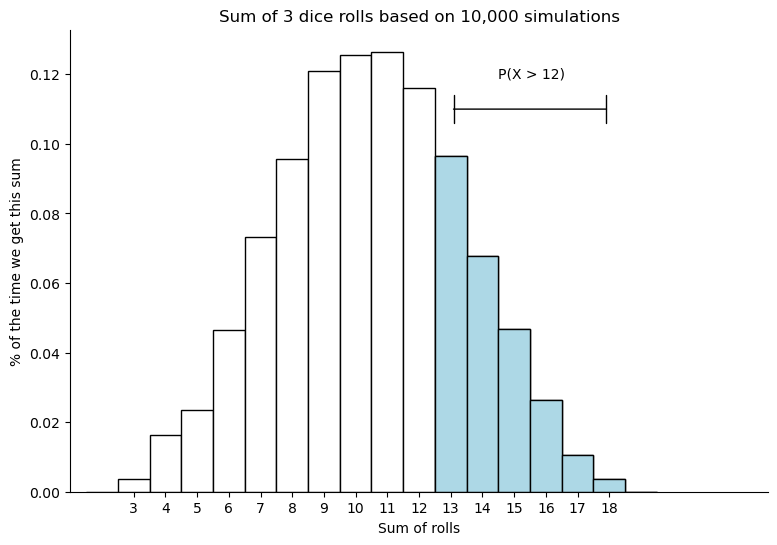

In [5]:
viz.simulation_example1(sums_by_trial)

In [8]:
# returns array of booleans, whether each trial won 
wins = sums_by_trial > 12
wins

array([ True, False, False, ...,  True,  True, False])

In [9]:
win_rate = wins.astype(int).mean()
win_rate

0.2519

In [10]:
expected_winnings = win_rate * 15 # expected winnings per trial, $ 3.78
cost = 5
expected_profit = expected_winnings - cost
expected_profit # per trial

-1.2214999999999998

We would expect to lose a little over a dollar each play. So don't play.

What if we pay for a sum of 12 as well:

In [12]:
wins = sums_by_trial >= 12
win_rate = wins.astype(int).mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5199999999999996

We'd expect to win about 50 cents per play if we included 12

###### <u>No Rest or Relaxation</u>

2. There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

In [13]:
p_nap = .3
ndays = ncols = 2
n_simulated_weekends = nrows = 10**5

In [14]:
data = np.random.random((nrows, ncols))
data

array([[0.26624922, 0.80607674],
       [0.59526116, 0.12651698],
       [0.51482118, 0.15583108],
       ...,
       [0.83065314, 0.719183  ],
       [0.1750674 , 0.70372591],
       [0.07747631, 0.68021143]])

In [15]:
# it is a nap if it is less than our probability of taking a nap
naps = data < p_nap
naps

array([[ True, False],
       [False,  True],
       [False,  True],
       ...,
       [False, False],
       [ True, False],
       [ True, False]])

In [16]:
# num naps per weekend
naps.sum(axis=1)

array([1, 1, 1, ..., 0, 1, 1])

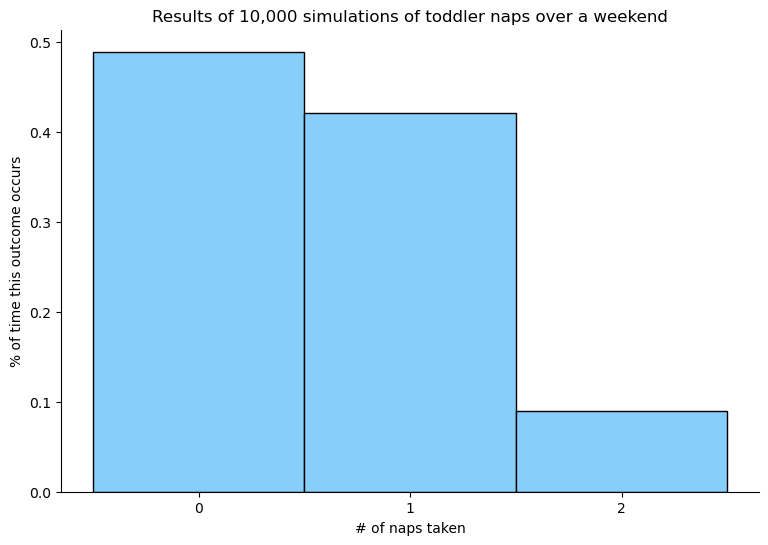

In [17]:
viz.simulation_example2(naps)

In [19]:
# probability that at least one nap is taken
(naps.sum(axis=1) >= 1).mean()

0.51083

In [20]:
# probability that no nap is taken
(naps.sum(axis=1) == 0).mean()

0.48917

###### <u> One with DF's </u>

3. What is the probability of getting at least one 3 in 3 dice rolls?

In [30]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)


(pd.DataFrame(rolls)                         # turn matrix into df
 .apply(lambda row: 3 in row.values, axis=1) # Apply a function along each row (axis1) of the DataFrame
 .mean())                                    # Take average of booleans

# need to do row.values to see value of Series object. Other wise we would compare 3 to the object itself

0.41782

### Hypothesis Testing